In [1]:
import os

In [2]:
import numpy as np
import pandas as pd

## The Data
In this example the data is loaded from a json-file with the following structure:
```json
[
  {
    "x": 0.4,
    "y": 20,
    "label": "one"
  },
  {
    "x": 0.6,
    "y": 40,
    "label": "two"
  },
  ...
]
```

In [3]:
fp_data = os.path.join('presentation', 'data', 'xyvalues.json')

In [4]:
df = pd.read_json(fp_data)

In [5]:
df

,x,y,label
0,0.40,20,one
1,0.60,40,two
2,0.50,35,three
3,0.65,45,four
4,0.80,60,five
5,0.90,60,six


to produce html-output from table:

In [72]:
print(df.to_html(max_rows=2))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x</th>
      <th>y</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.4</td>
      <td>20</td>
      <td>one</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.9</td>
      <td>60</td>
      <td>six</td>
    </tr>
  </tbody>
</table>


## Matplotlib
https://matplotlib.org/stable/tutorials/introductory/quick_start.html

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In case the inline-plots in the notebook look blurry, use:

In [7]:
%config InlineBackend.figure_format = 'svg'
# or: %config InlineBackend.figure_format='retina'

In [8]:
plt.style.use('default')

1. create an Axes instance to plot on it

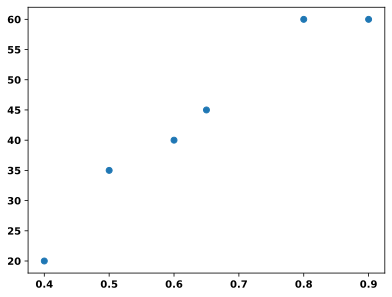

In [9]:
fig, ax = plt.subplots() # a figure containing a single Axes.
ax.scatter(df['x'], df['y'])
plt.show()

2. Styling the plot

In [10]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


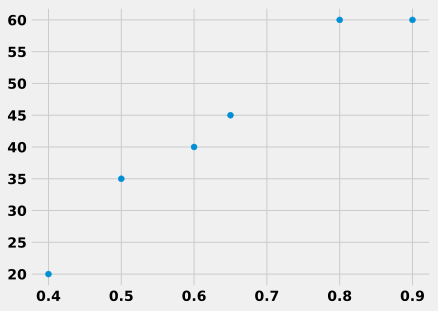

In [11]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots() # a figure containing a single Axes.
ax.scatter(df['x'], df['y'])
plt.show()

In [12]:
plt.rcParams.update({'figure.autolayout': True})

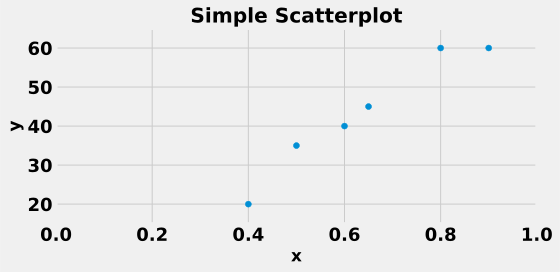

In [13]:
fig, ax = plt.subplots(figsize=(8, 4)) # a figure containing a single Axes.
ax.scatter(df['x'], df['y'])
labels = ax.get_xticklabels()
plt.setp(labels, fontsize=18, horizontalalignment='center')
labels = ax.get_yticklabels()
plt.setp(labels, fontsize=18)
ax.set(xlim=[0.0, 1.0], ylim=[15, 65], xlabel='x', ylabel='y',
       title='Simple Scatterplot')


plt.show()

3. Save the plot

In [14]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


## Bokeh

In [28]:
from bokeh.plotting import figure
from bokeh.plotting import show
from bokeh.plotting import save
from bokeh.plotting import output_file
from bokeh.io import output_notebook
from bokeh.io import reset_output

If no output mode is supplied, `bokeh.plotting.show` behaves as though `output_file` was called as a default. You need to call `output_notebook` in the beginning to display the figure inside the notebook.

Once `output_file` is called, a persistent mode is activated that saves output to files, and causes `show` to open new tabs with those files. You need to call `reset_output` to clear that persistent mode.

In [31]:
reset_output() 
output_notebook()

Loading BokehJS ...

Plot tools to report information, to change plot parameters such as zoom level or range extents, or to add, edit, or delete glyphs:

In [57]:
from bokeh.models import WheelZoomTool
from bokeh.models import ResetTool
from bokeh.models import SaveTool

In [58]:
TOOLTIPS = [
    
    ("cursor (x,y)", "($x, $y)"), 
    ("data point index", "@index"),
    ("(x,y)", "(@x, @y)"),
    ("label", "@label")
]

TOOLS = [WheelZoomTool(), ResetTool(), SaveTool()]

p = figure(width=600, height=300,
           tools = TOOLS,
           tooltips=TOOLTIPS,
           title="Simple Scatterplot", x_axis_label='x', y_axis_label='y')
p.scatter('x', 'y', size=10, source=df)

p.toolbar.autohide = True

p.title.text_font_size = "20pt"
p.title.align = "center"
p.axis.major_label_text_font_size = "14pt"
p.axis.axis_label_text_font_size = "16pt"

show(p)

Save the figure:

In [59]:
output_file(filename=os.path.join('presentation', 'graphs', 'bokeh_scatterplot.html'), title="Simple line plot")
save(obj=p)

# to switch back to inline display of the figures in the notebook, call reset_output() and output_notebook() 

'C:\\Users\\md\\projects\\revealjsintro\\presentation\\graphs\\bokeh_scatterplot.html'